In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
transform = transforms.ToTensor()
data_path = '../data/cifar/' # This can be any directory you want 
# to download cifar to
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
tr_images = cifar10_train.data
tr_targets = cifar10_train.targets

In [6]:
print("Training: ", len(cifar10_train))
print("Validating: ", len(cifar10_val))
image, label = cifar10_train[1]
image.shape

Training:  50000
Validating:  10000


torch.Size([3, 32, 32])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
9
truck


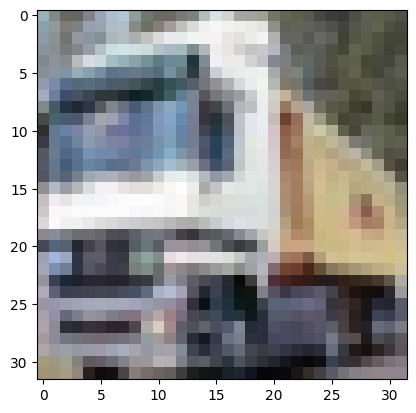

In [7]:
classes = cifar10_train.classes
print(classes)
print(label)
print(classes[label])
plt.imshow(image.permute(1, 2, 0))

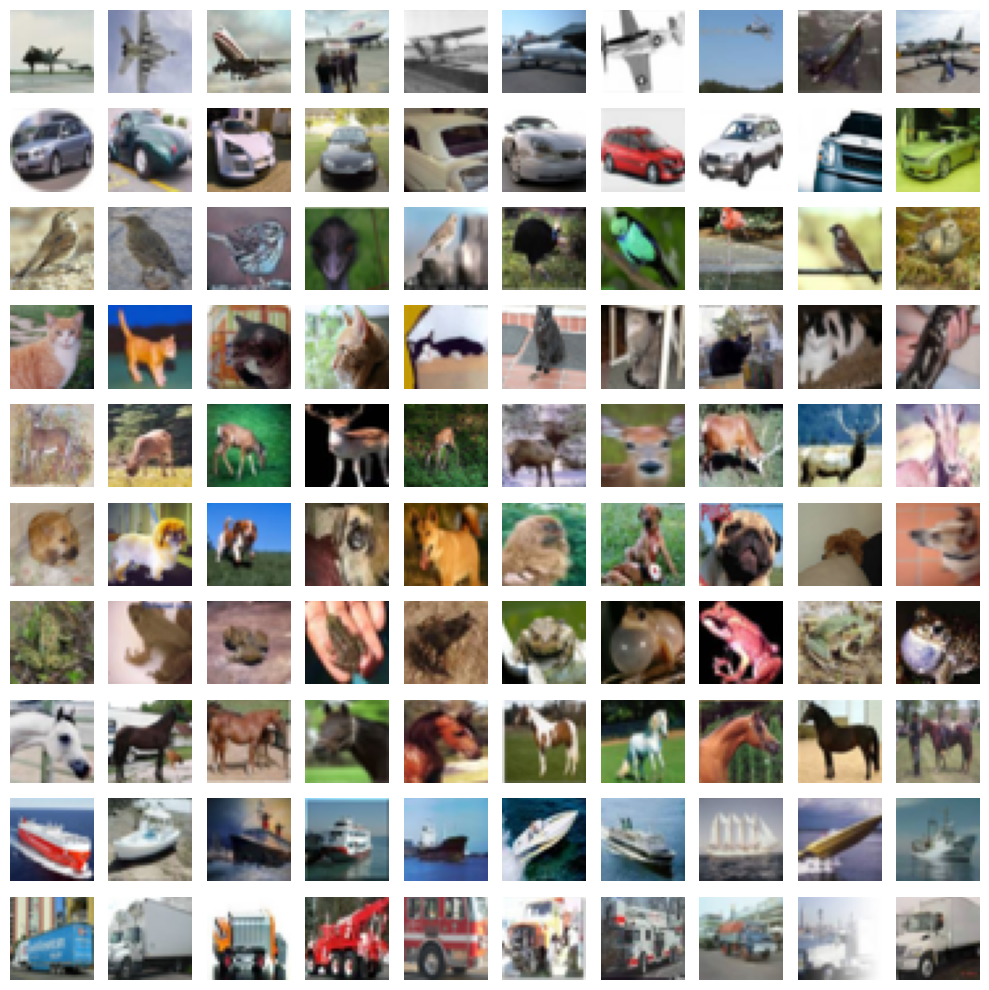

In [8]:
# display CIFAR10 

R, C = len(set(tr_targets)), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
tr_targets_array = np.array(tr_targets)
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets_array == label_class)[0]
    plt.ylabel(classes[label_class])
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x)
plt.tight_layout()